In [ ]:
# import library to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##importing the data

In [ ]:
data1 = "/content/drive/MyDrive/msc_testing_dataset.csv"
data2 = "/content/drive/MyDrive/msc_training_dataset.csv"

In [ ]:
df_test = pd.read_csv(data1)
df_training = pd.read_csv(data2)

# Exploring data to see the features

In [ ]:
df_test.head()


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
df_training.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


# Descriptive analysis

In [ ]:
df_test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [ ]:
df_training.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
# drop price column
x_training = df_training.drop('price', axis = 1)
x_test = df_test.drop('price', axis = 1)
y_training = df_training['price']
y_test = df_test['price']


In [ ]:
# train the regression models
kn= KNeighborsRegressor()
dt= DecisionTreeRegressor()
sv = SVR()
lr = LinearRegression()
rf = RandomForestRegressor()
kn.fit(x_training, y_training)
dt.fit(x_training, y_training)
sv.fit(x_training, y_training)
rf.fit(x_training, y_training)
lr.fit(x_training, y_training)

LinearRegression()

#Use the model to predict the price

In [ ]:
# evaluate the model on the training and testing sets

train_score = kn.score(x_training, y_training)
test_score = kn.score(x_test, y_test)
print(f"knTraining score: {train_score:.2f}")
print(f"knTesting score: {test_score:.2f}")
train_score = dt.score(x_training, y_training)
test_score = dt.score(x_test, y_test)
print(f"dtTraining score: {train_score:.2f}")
print(f"dtTesting score: {test_score:.2f}")
train_score = sv.score(x_training, y_training)
test_score = sv.score(x_test, y_test)
print(f"svTraining score: {train_score:.2f}")
print(f"svTesting score: {test_score:.2f}")
train_score = lr.score(x_training, y_training)
test_score = lr.score(x_test, y_test)
print(f"lrTraining score: {train_score:.2f}")
print(f"lrTesting score: {test_score:.2f}")
train_score = rf.score(x_training, y_training)
test_score = rf.score(x_test, y_test)
print(f"rfTraining score: {train_score:.2f}")
print(f"rfTesting score: {test_score:.2f}")

knTraining score: 0.95
knTesting score: 0.93
dtTraining score: 1.00
dtTesting score: 0.98
svTraining score: 0.13
svTesting score: 0.13
lrTraining score: 1.00
lrTesting score: 1.00
rfTraining score: 1.00
rfTesting score: 0.99


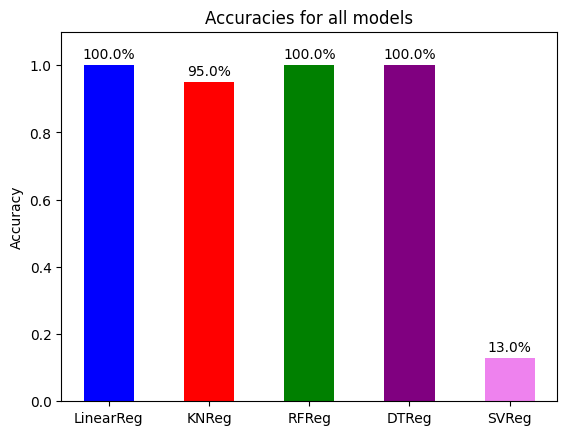

In [ ]:
#Visualize the comparism for all the models
accuracy = [1.00, 0.95, 1.00, 1.00, 0.13]
models = ["LinearReg","KNReg","RFReg","DTReg","SVReg"]


#plot the accuracy for all the models
plt.bar(models, accuracy, width=0.5, color=['blue','red','green','purple','violet'])
plt.ylim([0,1.1])
plt.title('Accuracies for all models')
plt.ylabel('Accuracy')

# Add percentages to the bars

for i, acc in enumerate(accuracy):
  plt.text(i, acc+0.02, f'{acc*100:.1f}%', ha='center')
plt.show()

#Make prediction of the house price

In [ ]:
#predict the price of the house on the test set
lr_predict = lr.predict(x_test)
kn_predict = kn.predict(x_test)
rf_predict = rf.predict(x_test)
sv_predict = sv.predict(x_test)
dt_predict = dt.predict(x_test)

In [ ]:
lr_mae = mean_absolute_error(y_test, lr_predict)
kn_mae = mean_absolute_error(y_test, kn_predict)
rf_mae = mean_absolute_error(y_test, rf_predict)
dt_mae = mean_absolute_error(y_test, dt_predict)
sv_mae = mean_absolute_error(y_test, sv_predict)

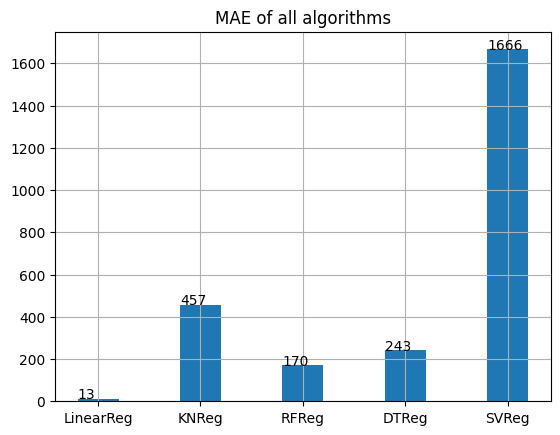

In [ ]:
errors = [lr_mae, kn_mae, rf_mae, dt_mae, sv_mae]
labels = ["LinearReg","KNReg","RFReg","DTReg","SVReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
  yval = int(bar.get_height())
  plt.text(bar.get_x(), yval + .005, yval)
  plt.grid()
  plt.title("MAE of all algorithms")



In [ ]:
print(lr_predict)

[ 5055.  7645. 11305.  8845. 11165. 11375. 11735.  6835.  7815.  5895.
  9095.  8295.  6695. 11305.  7205.  9165.  8775. 12745.  9745.  6655.
  9325.  7785.  7075.  4315.  9965.  6855.  7335.  8895.  6325.  9695.
  6645. 10305. 10485.  8195.  7565. 10355.  9475. 11115.  9765. 12825.
  6295.  5125.  9825.  8895. 11715.  6205.  4095. 11475.  9565.  5535.
 11455. 10395.  4125.  7735. 13055.  9595.  6445.  8365. 10155.  7835.
  8275. 14305.  7075.  8435. 12625.  7095. 11435. 10555. 10095.  5535.
  8235. 12095.  4215.  5865.  9355.  9245.  7065. 11625. 10855. 10825.
  8785.  7355. 11865.  8315. 11805.  5945.  8775.  8275.  7165.  8245.
  7575. 11925. 11965.  7975.  6645. 10795. 11235.  8195.  9355.  7445.
  7235.  8935.  4575.  9675.  5735.  5075. 10645.  9705.  8605. 12515.
  8165.  6105.  9175.  6705.  9265.  9605.  9925.  7345.  9215.  7785.
  8395.  7535.  6565.  8665. 12195. 10195. 10905.  5785.  5225.  6095.
  3845.  6235.  9975.  6465. 11025.  6565.  4975. 11695.  8105.  9135.
 10605

In [ ]:
# compare the predicted prices to the actual prices in the test data

results = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predict})
print(results.head(10))

   Actual  Predicted
0    5068     5055.0
1    7658     7645.0
2   11318    11305.0
3    8858     8845.0
4   11178    11165.0
5   11388    11375.0
6   11748    11735.0
7    6848     6835.0
8    7828     7815.0
9    5908     5895.0


#Feature importance

In [ ]:
#get the feature importance
lr = LinearRegression()
lr.fit(x_training, y_training)

LinearRegression()

In [ ]:

# Calculate feature importances using permutation importance

from sklearn.inspection import permutation_importance
result = permutation_importance(lr, x_test, y_test, n_repeats=10, random_state=0)
importance = result.importances_mean
feature_names = x_test.columns
sorted_idx = importance.argsort()

In [ ]:
# Print the feature importance
for feature,importance in zip(feature_names, importance):
  print(f'{feature}: {importance}')

room: 0.8121832894691033
bathroom: 0.009144395122102456
kitchen: 0.025360358030423157
french_door: 0.01522941442628899
backyard: 0.03182480903027576
furnished: 0.40446206349564884
green_paint: 0.013798096188817333
solar_power: 0.24146966951192503
woodfloor: 0.3594484261101563
qlm_security: 0.01978103037629292
club_access: 0.05327657571965999


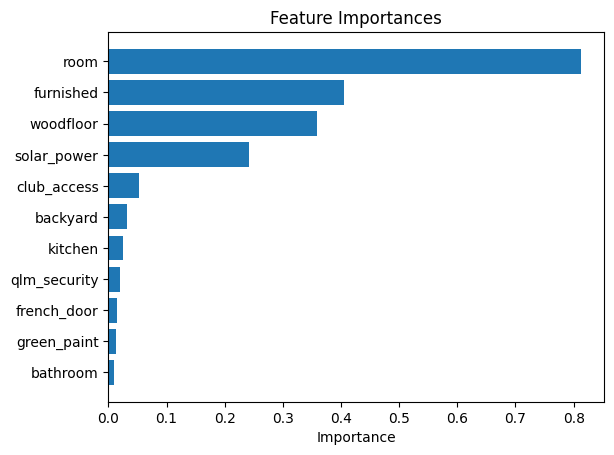

In [ ]:
#Plot the feature importances
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()